In [49]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [51]:
raw_df = pd.read_csv('/content/drive/MyDrive/machine learning practice/trainingset/samsung.csv')  # yahoo finance 로부터 데이터 다운로드

raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4740.119629,74195000.0,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4328.947754,74680000.0,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4359.979492,54390000.0,4476.348958,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4297.916992,40305000.0,4328.948079,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4476.349121,46880000.0,4378.081868,4440.662598


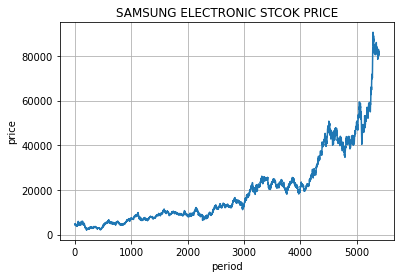

In [52]:
plt.title('SAMSUNG ELECTRONIC STCOK PRICE')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()

plt.plot(raw_df['Adj Close'], label='Adj Close')

plt.show()

In [53]:
# 통계정보 확인

raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5.389000e+03,5393.000000,5391.000000
mean,22801.887178,23043.991464,22559.285582,22801.909445,19920.044863,2.207838e+07,19934.224878,19925.585966
std,17736.201238,17906.827402,17572.109940,17733.296811,17322.636387,1.564053e+07,17313.297249,17292.697383
min,2540.000000,2760.000000,2420.000000,2730.000000,2117.926025,0.000000e+00,2164.473877,2179.989746
25%,9880.000000,9990.000000,9800.000000,9900.000000,7726.937988,1.185265e+07,7726.939453,7709.871631
50%,15760.000000,15940.000000,15560.000000,15800.000000,12808.596680,1.803935e+07,12802.806970,12809.314840
75%,29280.000000,29560.000000,29000.000000,29280.000000,24566.556640,2.771475e+07,24558.166020,24555.269140
max,90300.000000,96800.000000,89500.000000,91000.000000,90597.414060,1.642150e+08,90033.252600,89562.014060


In [54]:
# Missing Data 확인 missing value 즉 NAN이 각각의 항목에서 몇개 있는지 나타내는 것
# 여기서는 주식장을 열지 않는 공휴일, 주말에는 missing value값인 0이 존재하는데 이것을 나타냄
# 주식같은 금융데이터는 NAN으로 표시되는 부분을 평균값이나 중간값으로 대체하지 않고 해당 행을 삭제하는것이 일반적
# 5MA,3MA는 각각 5일치 수치 평균낸거, 3일치 평균낸거라고 생각하면 될듯??
raw_df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
3MA          2
5MA          4
dtype: int64

In [55]:
# 최소값이 0 인 column 체크(공휴일같이 주식장 안여는날 체크)

for col in raw_df.columns:  # Open	High	Low	Close	Adj Close	Volume	3MA	5MA로 8번 반복

    if raw_df[col].min() == 0:  # 항목에 0이 존재한다면
        col_name = col  # 항목 반환
        print(col_name, type(col_name))
#여기서 Volume열에 0이 존재하는것을 유추해냄

Volume <class 'str'>


In [56]:
raw_df.loc[raw_df['Volume']==0] # 위코드로 알아낸 Volume값에서 어디 어디가 0인지 알아냄

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
23,2000-02-04,5130.0,5130.0,5130.0,5130.0,3979.839355,0.0,4010.871419,4097.760644
41,2000-03-01,5120.0,5120.0,5120.0,5120.0,3972.081543,0.0,3889.329834,3914.672510
66,2000-04-05,6800.0,6800.0,6800.0,6800.0,5275.420410,0.0,5353.000163,5345.242773
72,2000-04-13,6910.0,6910.0,6910.0,6910.0,5360.757324,0.0,5409.891439,5495.746680
84,2000-05-01,6000.0,6000.0,6000.0,6000.0,4654.781250,0.0,4499.622070,4443.765039
...,...,...,...,...,...,...,...,...,...
4623,2018-04-30,53000.0,53000.0,53000.0,53000.0,47819.117190,0.0,47560.473960,46736.421880
4624,2018-05-02,53000.0,53000.0,53000.0,53000.0,47819.117190,0.0,47819.117190,47194.763280
4625,2018-05-03,53000.0,53000.0,53000.0,53000.0,47819.117190,0.0,47819.117190,47663.931250
5077,2020-03-09,56500.0,56500.0,56500.0,56500.0,53774.468750,0.0,54186.897140,53983.855470


In [57]:
# 각 column에 0 몇개인지 확인

for col in raw_df.columns:

    missing_rows = raw_df.loc[raw_df[col]==0].shape[0]  # shape[0], shape[1]를 이용하여 전체 행의 갯수와 열의 갯수를 반환받을 수 있다.
    print(col + ': ' + str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 116
3MA: 0
5MA: 0


In [58]:
# 먼저 0 을 NaN 으로 바꾼후, Missing Data 처리

raw_df['Volume'] = raw_df['Volume'].replace(0, np.nan)  # volume값에서 0을 NAN으로 변경해준다

# 각 column에 0 몇개인지 확인(다 NAN으로 바꿔서 모두 0으로 된것을 확인할 수 있음)

for col in raw_df.columns:

    missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0
3MA: 0
5MA: 0


In [59]:
# missing data 확인

raw_df.isnull().sum()

Date           0
Open           6
High           6
Low            6
Close          6
Adj Close      6
Volume       122
3MA            2
5MA            4
dtype: int64

In [60]:
raw_df.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
3MA           True
5MA           True
dtype: bool

In [61]:
raw_df.loc[raw_df['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,6989.931152,6910.412353
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN,49382.673830,49719.997070
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,49373.792970,49324.969730
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,44927.763670,44190.302730
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,40569.835940,40775.886720
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,49695.419920,49364.432620


In [62]:
# missing data 처리
#변환한 NAN값을 dropna()로 없애버린다
raw_df = raw_df.dropna()

raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [63]:
# 정규화 (Date 제외한 모든 수치부분 정규화)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()#MinMaxScaler 최대= 1 최소= 0, StandardScaler 평균= 0 표준편차= 1 RobustScaler 중앙값 0 IQR(1분위(25%) ~ 3분위(75%)) = 1, MaxAbsScaler 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close',  #정규화 대상 column 정의
              '3MA', '5MA', 'Volume']

scaled_df = scaler.fit_transform(raw_df[scale_cols])   #정규화 수행, fit_transform()은 training data에만 사용함 transform()은 test data에만 사용 그 차이는 fit=학습이란 느낌인데 test까지 fit이 붙으면 test까지 학습해 버리기 때문
#하지만 여기서 정규화를 수행한 scaled_df는 numpy값이여서 만약 이러한 numpy데이터 값을 바로 사용하지 않고 pandas형태로 사용하고자 한다면 dataframe으로 새롭게 정의를 해주어야 한다
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)  #정규화된 새로운 dataframe 생성

print(scaled_df)

          Open      High       Low     Close  Adj Close       3MA       5MA  \
0     0.034868  0.032008  0.036288  0.034440   0.026655  0.025192  0.025698   
1     0.037375  0.035517  0.038470  0.034440   0.026655  0.025634  0.025094   
2     0.034982  0.031689  0.036518  0.033873   0.026217  0.026163  0.025343   
3     0.034868  0.031689  0.036059  0.033760   0.026129  0.025987  0.025503   
4     0.036235  0.033177  0.037437  0.035120   0.027181  0.026163  0.026018   
...        ...       ...       ...       ...        ...       ...       ...   
5264  0.891750  0.830923  0.896647  0.881047   0.885878  0.895299  0.903144   
5265  0.892890  0.834113  0.897795  0.885578   0.890399  0.894920  0.900854   
5266  0.899727  0.841557  0.903537  0.895774   0.900571  0.897955  0.902457   
5267  0.895169  0.835177  0.898944  0.885578   0.890399  0.899472  0.902228   
5268  0.895169  0.833050  0.896647  0.881047   0.885878  0.897955  0.901083   

        Volume  
0     0.285359  
1     0.363715  


In [64]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size]) #슬라이싱을 이용하여 2차원의 모양의 feature을 생성
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list) #생성한 feature을 numpy로 만들어주어서 (batch size, time steps, input dims)의 3차원 형태를 가짐

In [65]:
# feature_df, label_df 생성

feature_cols = [ '3MA', '5MA', 'Adj Close' ]
label_cols = [ 'Adj Close' ]

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

In [66]:
# DataFrame => Numpy 변환

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

(5269, 3) (5269, 1)


In [67]:
window_size = 40  #40개의 데이터를 통해 뒤에있는 데이터를 구하겠다는 뜻

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(5229, 40, 3) (5229, 1)


In [68]:
# train, test 분리

#split = int(len(X)*0.95)
split = -200

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5029, 40, 3) (5029, 1)
(200, 40, 3) (200, 1)


In [69]:
# model 생성

model = Sequential()

model.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape)) #input_shape=x_train[0].shape은 input_shape(40,3)과 똑같다

model.add(Dense(1, activation='linear'))

In [70]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               67584     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [71]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)  #5회 진행동한 진척이 없으면 멈춘다

model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=100, batch_size=16,
          callbacks=[early_stop])

Epoch 1/100
315/315 [==============================] - 26s 72ms/step - loss: 7.8264e-04 - mae: 0.0108 - val_loss: 0.0010 - val_mae: 0.0215
Epoch 2/100
315/315 [==============================] - 11s 35ms/step - loss: 8.5922e-05 - mae: 0.0060 - val_loss: 7.0848e-04 - val_mae: 0.0181
Epoch 3/100
315/315 [==============================] - 11s 35ms/step - loss: 9.0348e-05 - mae: 0.0062 - val_loss: 9.2087e-04 - val_mae: 0.0219
Epoch 4/100
315/315 [==============================] - 12s 37ms/step - loss: 7.5398e-05 - mae: 0.0057 - val_loss: 0.0011 - val_mae: 0.0269
Epoch 5/100
315/315 [==============================] - 12s 37ms/step - loss: 7.3087e-05 - mae: 0.0056 - val_loss: 5.7771e-04 - val_mae: 0.0167
Epoch 6/100
315/315 [==============================] - 11s 35ms/step - loss: 5.8836e-05 - mae: 0.0050 - val_loss: 0.0011 - val_mae: 0.0269
Epoch 7/100
315/315 [==============================] - 11s 35ms/step - loss: 6.2194e-05 - mae: 0.0051 - val_loss: 3.5111e-04 - val_mae: 0.0137
Epoch 8/100

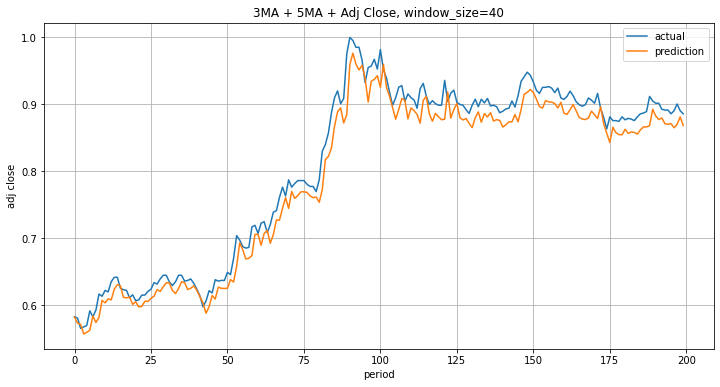

In [72]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()